In [14]:
import numpy as np
from numpy.polynomial import polynomial as npoly
from numpy.random import normal
import sympy as sp
from sympy.abc import x
from functools import reduce
import matplotlib.pyplot as plt

This is the polynomial we are going to study:
$$ w(x) = \prod_{r=1}^{20}\left(x - r \right) = \sum_{i=0}^{20} a_i x^i $$

We have to find the $a_i$:

In [3]:
w = reduce(lambda acc, term: acc * term,
           [sp.poly(x - float(r)) for r in range(1, 21)])
w

Poly(1.0*x**20 - 210.0*x**19 + 20615.0*x**18 - 1256850.0*x**17 + 53327946.0*x**16 - 1672280820.0*x**15 + 40171771630.0*x**14 - 756111184500.0*x**13 + 11310276995381.0*x**12 - 135585182899530.0*x**11 + 1.3075350105404e+15*x**10 - 1.01422998655115e+16*x**9 + 6.30308120992949e+16*x**8 - 3.11333643161391e+17*x**7 + 1.20664780378037e+18*x**6 - 3.59997951794761e+18*x**5 + 8.03781182264505e+18*x**4 - 1.2870931245151e+19*x**3 + 1.38037597536407e+19*x**2 - 8.7529480367616e+18*x + 2.43290200817664e+18, x, domain='RR')

Numpy represents a polynomial as an array of coefficients starting from power zero (bias term):

In [4]:
coefs = np.flip(np.array(w.as_list(), dtype=np.float64))
coefs

array([ 2.43290201e+18, -8.75294804e+18,  1.38037598e+19, -1.28709312e+19,
        8.03781182e+18, -3.59997952e+18,  1.20664780e+18, -3.11333643e+17,
        6.30308121e+16, -1.01422999e+16,  1.30753501e+15, -1.35585183e+14,
        1.13102770e+13, -7.56111184e+11,  4.01717716e+10, -1.67228082e+09,
        5.33279460e+07, -1.25685000e+06,  2.06150000e+04, -2.10000000e+02,
        1.00000000e+00])

Now perturb the coefficients 100 times and find the roots of the perturbed polynomial:

$a_i \ \rightarrow\ n_ia_i$, where $n_i \sim \mathcal{N}\left(1,\ 10^{-10} \right)$.

In [15]:
def find_roots_perturbed(coefs: np.ndarray):
    n = coefs.shape[0]
    w = npoly.Polynomial(coefs * normal(loc=1.0, scale=1e-10, size=n))
    return w.roots()

In [5]:
results = list(np.array([find_roots_perturbed(coefs) for _ in range(100)]).transpose())

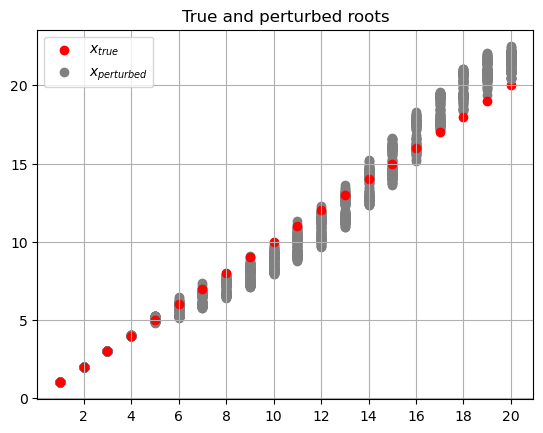

In [38]:
plt.xticks(range(0, 21, 2))
plt.grid(True)
plt.title('True and perturbed roots')
for i in range(1, 20):
    y_sampled = results[i - 1]
    x_sampled = np.ones(100) * i
    plt.scatter(x_sampled, y_sampled, color='gray')
    plt.scatter(i, i, color='red')
plt.scatter(20, 20, color='red', label=r'$x_{true}$')
plt.scatter(np.ones(100) * 20, results[-1], color='gray', label=r'$x_{perturbed}$')
plt.legend()
plt.show()

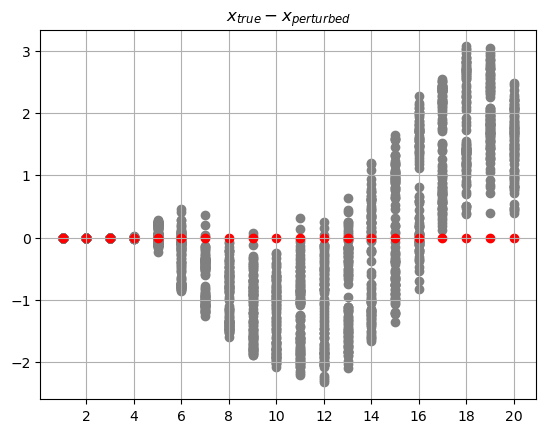

In [32]:
plt.xticks(range(0, 21, 2))
plt.grid(True)
plt.title(r'$x_{true} - x_{perturbed}$')
for i in range(1, 21):
    y_sampled = results[i - 1] - i
    x_sampled = np.ones(100) * i
    plt.scatter(x_sampled, y_sampled, color='gray')
    plt.scatter(i, 0.0, color='red')
plt.show()

In fact, some roots ended up being complex even with perturbations that small. So the plots show not precisely $x_{perturbed}$, but rather its real part.

In [55]:
x_true = np.arange(1, 21)
coefs_perturbed = coefs * normal(loc=1.0, scale=1e-10, size=21)
x_sampled = npoly.Polynomial(coefs_perturbed).roots()

absolute = np.linalg.norm(x_sampled - x_true) / np.linalg.norm(coefs_perturbed - coefs)
print(f'Absolute contition number: {absolute}')

relative = ((np.linalg.norm(x_sampled - x_true) / np.linalg.norm(x_true)) /
            (np.linalg.norm(coefs_perturbed - coefs) / np.linalg.norm(coefs)))
print(f'Relative condition number: {relative}')

Absolute contition number: 6.285127036927246e-09
Relative condition number: 2669806170.311731
